In [2]:
import pandas as pd

# Replace with your file path
df = pd.read_csv("taxi_fare.csv")




In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load dataset
df = pd.read_csv("taxi_fare.csv")

# Convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Remove rows with invalid values
df = df[df['passenger_count'] > 0]
df = df[df['fare_amount'] > 0]
df = df[df['total_amount'] > 0]
df = df[df['RatecodeID'].between(1, 6)]

# Filter coordinates within NYC bounds
def valid_coord(lat, lon):
    return 40 <= lat <= 42 and -75 <= lon <= -72

df = df[
    df.apply(lambda row:
        valid_coord(row['pickup_latitude'], row['pickup_longitude']) and
        valid_coord(row['dropoff_latitude'], row['dropoff_longitude']),
        axis=1
    )
]


In [6]:
# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

# Create trip_distance column
df['trip_distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                                df['dropoff_latitude'], df['dropoff_longitude'])

# Time-based features
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['is_weekend'] = df['pickup_day'].isin(['Saturday', 'Sunday']).astype(int)
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['am_pm'] = df['hour_of_day'].apply(lambda x: 'AM' if x < 12 else 'PM')
df['is_night'] = df['hour_of_day'].apply(lambda x: 1 if (x <= 5 or x >= 22) else 0)

# Convert UTC to EDT (UTC - 4 hours)
df['pickup_time_edt'] = df['tpep_pickup_datetime'] - pd.Timedelta(hours=4)


In [7]:
pip install matplotlib seaborn


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("taxi_fare_cleaned.csv")

# Set seaborn style
sns.set(style="whitegrid")


In [26]:
import os
if not os.path.exists("plots"):
    os.makedirs("plots")


In [27]:
plt.savefig("plots/fare_distribution.png")


<Figure size 640x480 with 0 Axes>

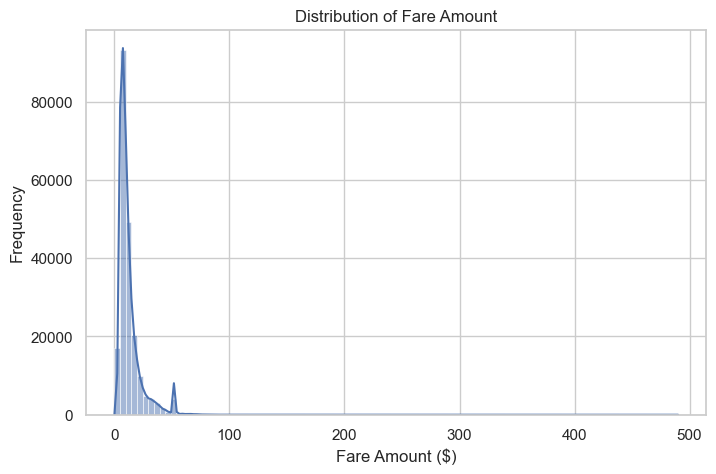

In [ ]:
#univarient analysis
#Distribuution of Fair amount 
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=100, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.savefig("plots/fare_distribution.png")
plt.show()


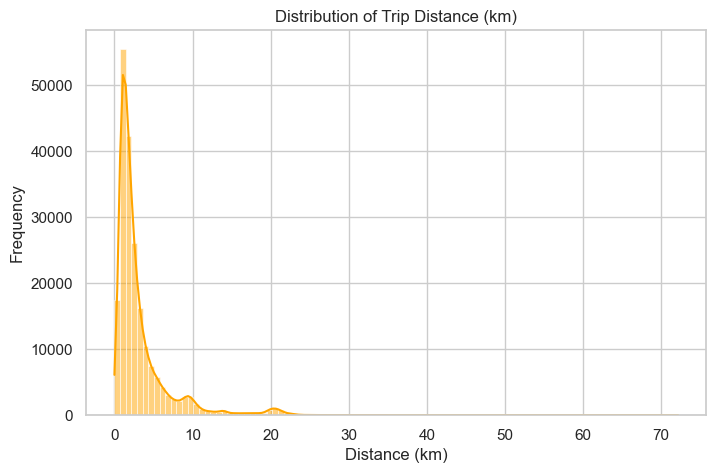

In [ ]:
#Distribution of trip_distance
plt.figure(figsize=(8, 5))
sns.histplot(df['trip_distance'], bins=100, kde=True, color="orange")
plt.title("Distribution of Trip Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.savefig("plots/trip_distance_distribution.png")
plt.show()


C:\Users\Jdeep\AppData\Local\Temp\ipykernel_24284\2814032985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=df, palette="Set2")


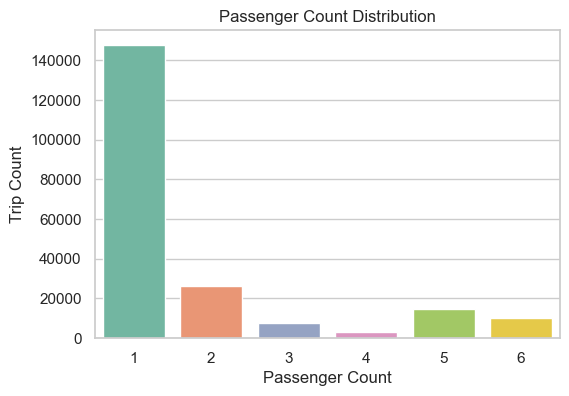

In [35]:
#) Passenger Count Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='passenger_count', data=df, palette="Set2")
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Trip Count")
plt.savefig("plots/Passenger_count_distribution.png")
plt.show()


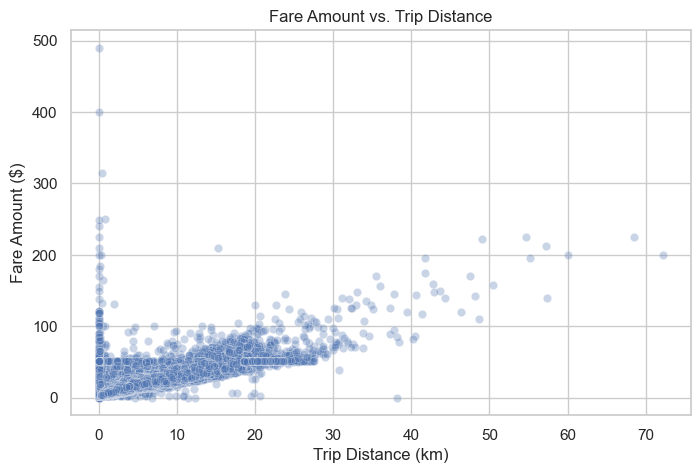

In [36]:
#bivarient
#fair vs dis
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.title("Fare Amount vs. Trip Distance")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.savefig("plots/fare_vs_trip_distance.png")
plt.show()


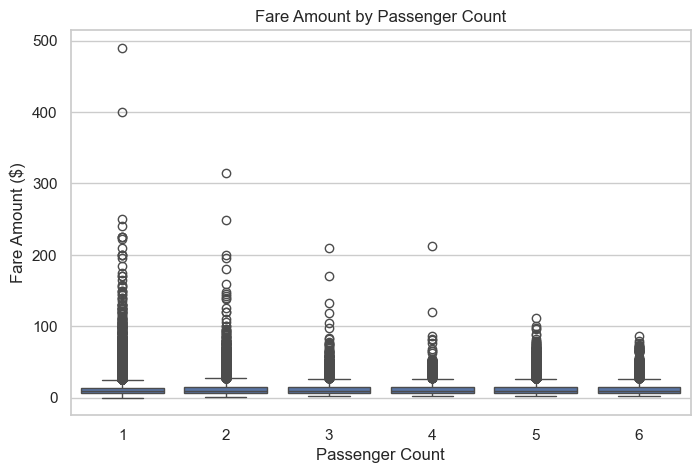

In [37]:
#) Fare vs Passenger Count
plt.figure(figsize=(8, 5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Amount by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.savefig("plots/fareamount_vs_passcount.png")
plt.show()


C:\Users\Jdeep\AppData\Local\Temp\ipykernel_24284\2542426491.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour_of_day', y='total_amount', data=df, estimator='mean', ci=None)


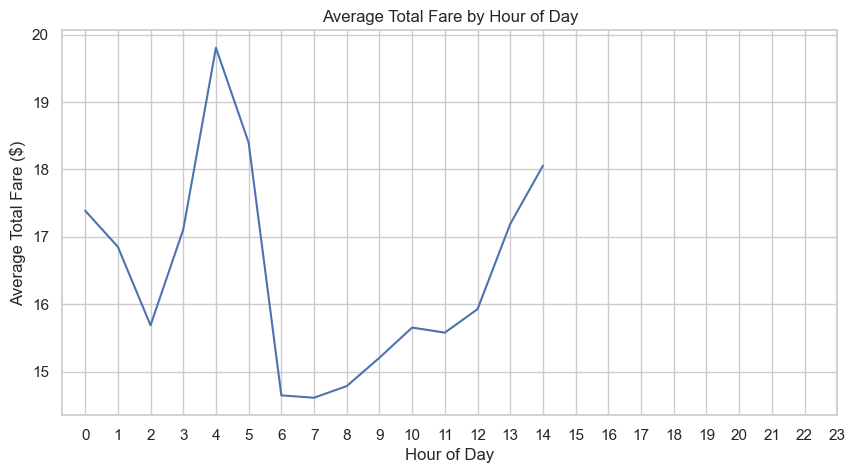

In [38]:
#Average Fare by Hour of Day
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour_of_day', y='total_amount', data=df, estimator='mean', ci=None)
plt.title("Average Total Fare by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Fare ($)")
plt.xticks(range(0, 24))
plt.savefig("plots/avg_fair_by_hour.png")
plt.show()


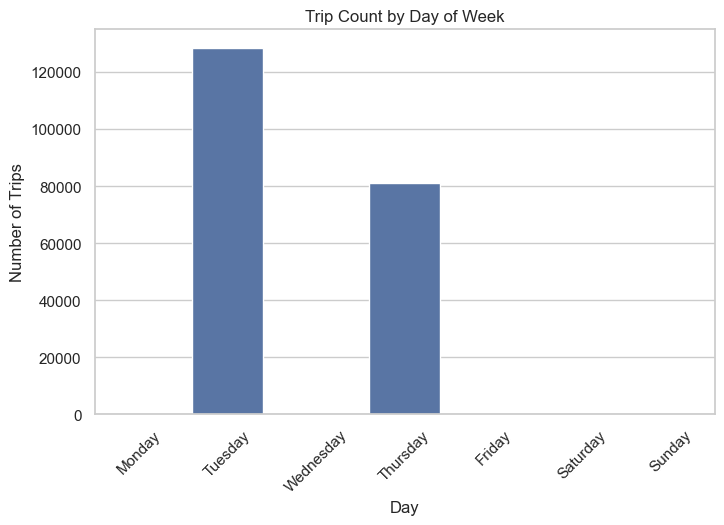

In [ ]:
#Time based pattern
#Trip Count by Pickup Day
plt.figure(figsize=(8, 5))
sns.countplot(x='pickup_day', data=df, order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
plt.title("Trip Count by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.savefig("plots/trip_count_by_dayof_week.png")
plt.show()


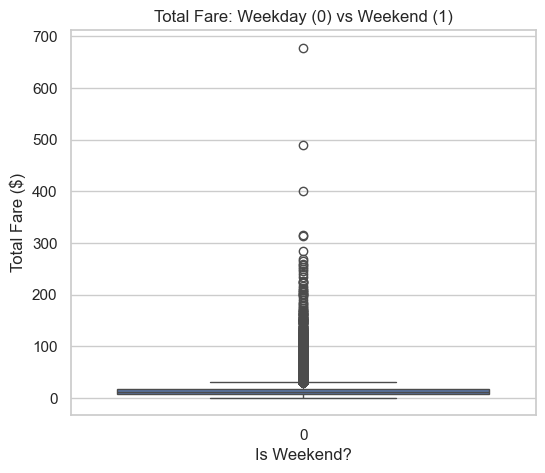

In [39]:
#fair diff weeday vs weekwnd
plt.figure(figsize=(6, 5))
sns.boxplot(x='is_weekend', y='total_amount', data=df)
plt.title("Total Fare: Weekday (0) vs Weekend (1)")
plt.xlabel("Is Weekend?")
plt.ylabel("Total Fare ($)")
plt.savefig("plots/weekday_vs_weekend.png")
plt.show()


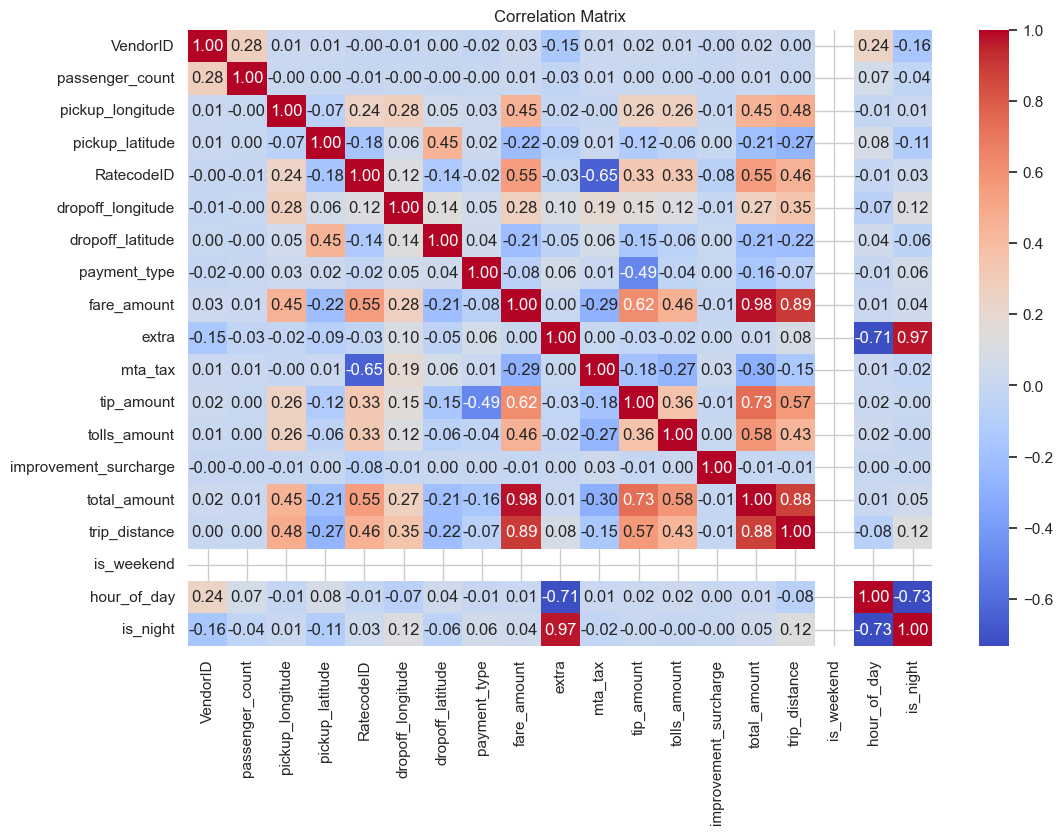

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("plots/Correlation_Matrix.png")
plt.show()


In [41]:
from scipy import stats

# --- 1. Outlier Removal (Z-Score for fare_amount and trip_distance) ---
df = df[(np.abs(stats.zscore(df['fare_amount'])) < 3)]
df = df[(np.abs(stats.zscore(df['trip_distance'])) < 3)]

# --- 2. Skewness Fix ---
# Check skew first
print("Skewness before:", df['trip_distance'].skew())

# Apply log transformation
df['log_trip_distance'] = np.log1p(df['trip_distance'])

# Check again
print("Skewness after:", df['log_trip_distance'].skew())

# --- 3. Encoding Categorical Features ---
# One-hot encoding for: pickup_day, am_pm
df = pd.get_dummies(df, columns=['pickup_day', 'am_pm'], drop_first=True)

# Label encoding for: store_and_fwd_flag, payment_type
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
df['payment_type'] = df['payment_type'].astype('category').cat.codes


Skewness before: 1.7009869434238971
Skewness after: 0.5782802556704952


In [42]:
df.to_csv("taxi_fare_transformed.csv", index=False)


In [ ]:
# Drop ID/time-related columns that won't be used directly
df_fs = df.drop([
    'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_time_edt',
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
    'trip_distance'  # We use 'log_trip_distance' instead
], axis=1)
#

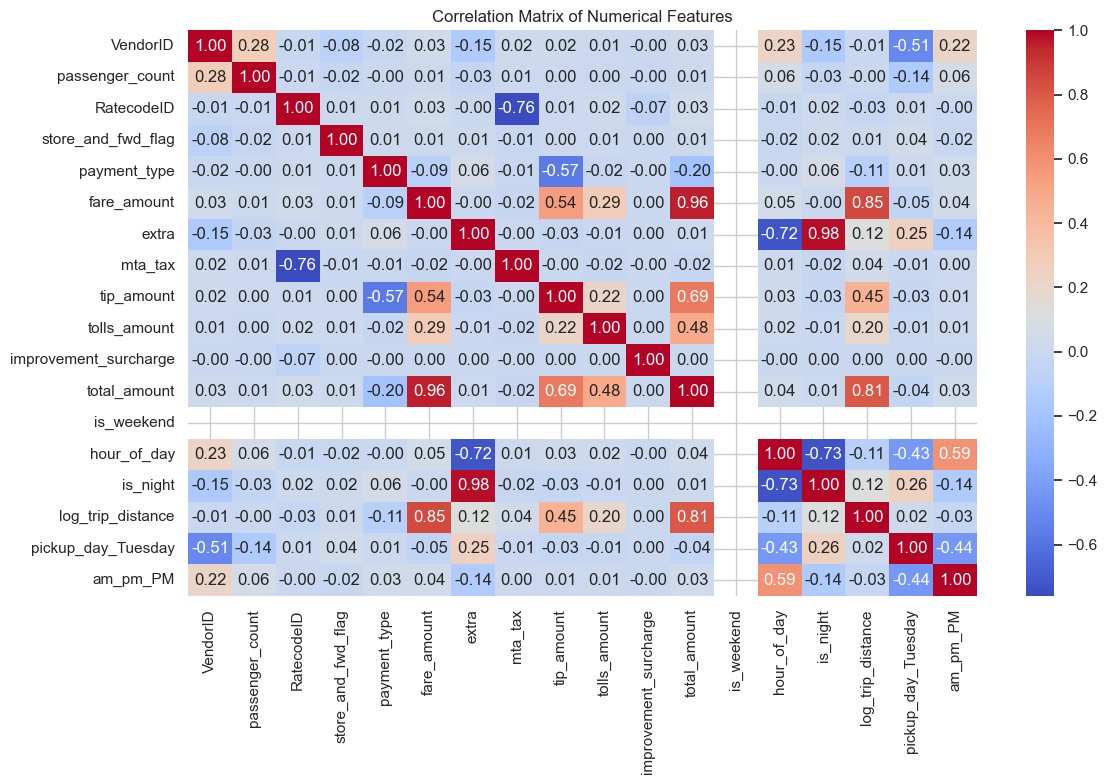

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_fs.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.savefig("plots/correlation_matrix.png")
plt.show()
#

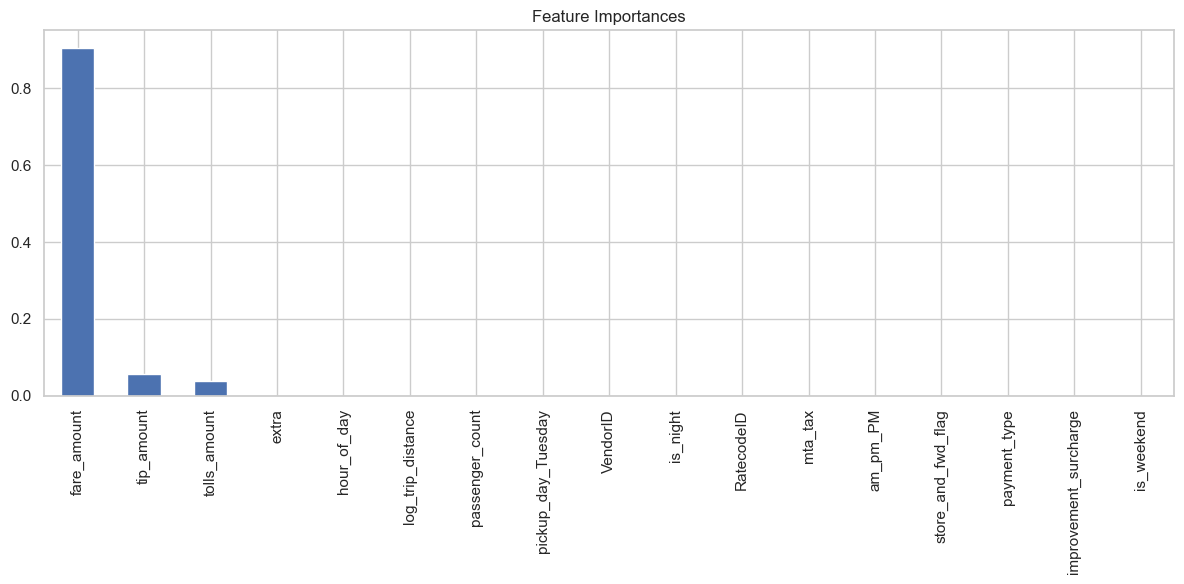

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = df_fs.drop("total_amount", axis=1)
y = df_fs["total_amount"]

# Train a quick random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Feature Importances')
plt.tight_layout()
plt.savefig("plots/feature_importance.png")
plt.show()
#

In [46]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("taxi_fare_transformed.csv")  # or use the latest updated df

# Drop only irrelevant columns
df = df.drop([
    'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_time_edt',
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
    'trip_distance'  # already using log_trip_distance
], axis=1)


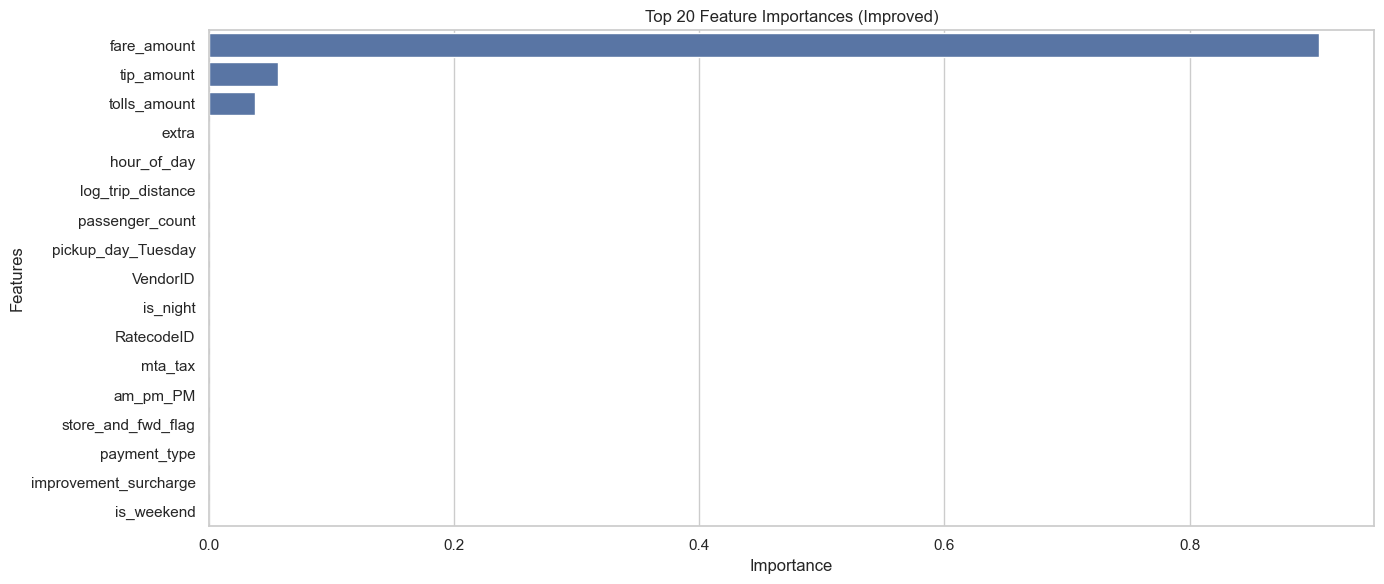

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Split features and target
X = df.drop("total_amount", axis=1)
y = df["total_amount"]

# Train a better model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot Top 20 Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Feature Importances (Improved)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("plots/improved_feature_importance.png")
plt.show()


In [ ]:
# X = df_fs.drop([
#     'total_amount',      # Target
#     'fare_amount',       # Strong leakage
#     'tip_amount',        # Also part of total
#     'tolls_amount'       # Also part of total
# ], axis=1)

# y = df_fs['total_amount']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate a fresh copy with all meaningful features included
df_features = df.copy()

# Drop only true non-predictive columns (IDs, raw coords, datetime info)
df_features = df_features.drop([
    'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_time_edt',
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
    'trip_distance'  # using log_trip_distance instead
], axis=1)

# Separate input features and target
X = df_features.drop("total_amount", axis=1)
y = df_features["total_amount"]

# Fit a better model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Plot improved feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(14, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False).head(20), y=feature_importances.sort_values(ascending=False).head(20).index)
plt.title("Top 20 Feature Importances (Improved)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("plots/improved_feature_importance.png")
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("taxi_fare_transformed.csv")

# Drop irrelevant columns
df = df.drop([
    'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_time_edt',
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
    'trip_distance'
], axis=1)

# Split features and target
X = df.drop("total_amount", axis=1)
y = df["total_amount"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    
    print(f"📌 {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.4f}")
    print(f"MSE     : {mse:.4f}")
    print(f"RMSE    : {rmse:.4f}")
    print("-" * 40)

# Train and evaluate each model
for name, model in models.items():
    evaluate_model(name, model)


📌 Linear Regression
R² Score: 1.0000
MAE     : 0.0000
MSE     : 0.0000
RMSE    : 0.0021
----------------------------------------
📌 Ridge Regression
R² Score: 1.0000
MAE     : 0.0001
MSE     : 0.0000
RMSE    : 0.0021
----------------------------------------
📌 Lasso Regression
R² Score: 0.9952
MAE     : 0.3690
MSE     : 0.3221
RMSE    : 0.5675
----------------------------------------
📌 Random Forest
R² Score: 0.9995
MAE     : 0.0090
MSE     : 0.0316
RMSE    : 0.1778
----------------------------------------
📌 Gradient Boosting
R² Score: 0.9994
MAE     : 0.1225
MSE     : 0.0398
RMSE    : 0.1995
----------------------------------------


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Random Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Evaluate best model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = best_rf.predict(X_test)

print("🔍 Best Random Forest Model Performance")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE     : {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE    : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Jdeep\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jdeep\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jdeep\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Jdeep\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Jdeep\anaconda3\Lib\site-packages\s

🔍 Best Random Forest Model Performance
R² Score: 0.9977
MAE     : 0.1026
RMSE    : 0.3981


In [59]:
import pickle

# Save model
with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)


In [64]:
if st.button("Predict Fare"):
    prediction = model.predict(input_df)[0]
    st.success(f"💰 Predicted Fare: ${prediction:.2f}")


In [ ]:
import streamlit as st
import pickle
import numpy as np
from datetime import datetime
import pandas as pd

# Load the trained model
with open("best_model.pkl", "rb") as f:
    model = pickle.load(f)

# ------------------------ Haversine Function ------------------------
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

# ------------------------ Streamlit UI ------------------------

st.title("🚖 TripFare Prediction App")
st.markdown("Predict NYC taxi fare based on trip details")

# Input fields
pickup_datetime = st.datetime_input("Pickup Date and Time", datetime.now())
passenger_count = st.slider("Passenger Count", 1, 6, 1)
pickup_lat = st.number_input("Pickup Latitude", value=40.7614327)
pickup_lon = st.number_input("Pickup Longitude", value=-73.9798156)
dropoff_lat = st.number_input("Dropoff Latitude", value=40.6413111)
dropoff_lon = st.number_input("Dropoff Longitude", value=-73.7803331)
rate_code = st.selectbox("RatecodeID", [1, 2, 3, 4, 5, 6])
payment_type = st.selectbox("Payment Type", ['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'])
store_and_fwd = st.radio("Store and Forward Flag", ['N', 'Y'])

# Feature engineering
pickup_day = pickup_datetime.strftime("%A")
hour_of_day = pickup_datetime.hour
am_pm = "AM" if hour_of_day < 12 else "PM"
is_weekend = 1 if pickup_day in ['Saturday', 'Sunday'] else 0
is_night = 1 if hour_of_day <= 5 or hour_of_day >= 22 else 0
distance = haversine(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
log_distance = np.log1p(distance)

# Encode categorical
payment_map = {'Credit card': 1, 'Cash': 2, 'No charge': 3, 'Dispute': 4, 'Unknown': 5, 'Voided trip': 6}
store_map = {'N': 0, 'Y': 1}

# One-hot encodings
day_dummies = pd.get_dummies(pd.Series(pickup_day), prefix='pickup_day')
ampm_dummies = pd.get_dummies(pd.Series(am_pm), prefix='am_pm')

# Final input
input_data = {
    'passenger_count': passenger_count,
    'RatecodeID': rate_code,
    'payment_type': payment_map[payment_type],
    'store_and_fwd_flag': store_map[store_and_fwd],
    'extra': 0.5,
    'mta_tax': 0.5,
    'tip_amount': 1.0,
    'tolls_amount': 0.0,
    'improvement_surcharge': 0.3,
    'fare_amount': 7.0,
    'log_trip_distance': log_distance,
    'hour_of_day': hour_of_day,
    'is_weekend': is_weekend,
    'is_night': is_night
}

# Merge encoded dummies
input_data.update(day_dummies.to_dict(orient='records')[0])
input_data.update(ampm_dummies.to_dict(orient='records')[0])

# Create DataFrame and fill missing one-hot columns
input_df = pd.DataFrame([input_data])
expected_cols = model.feature_names_in_
for col in expected_cols:
    if col not in input_df.columns:
        input_df[col] = 0
input_df = input_df[expected_cols]

# Predict
if st.button("Predict Fare"):
    prediction = model.predict(input_df)[0]
    st.success(f"💰 Predicted Fare: ${prediction:.2f}")


In [69]:
import webbrowser
import os

if __name__ == "__main__":
    # Launch the app with web browser auto-open
    port = 8501
    url = f"http://localhost:{port}"
    
    # Only open browser if running directly
    if os.environ.get('STREAMLIT_RUN_CONTEXT') is None:
        webbrowser.open_new(url)
